<a href="https://colab.research.google.com/github/NikitaShlapak/python-for-students/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Визуализация данных

Важно не только уметь проанализировать данные, но и грамотно их показать и, что ещё сложнее - правильно на них посмотреть. Рассмотрим несколько прмеров.

Начинаем, как всегда со святой троицы импортов:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Теперь сгенерируем какие-нибудь данные

In [ ]:
np.random.seed(10)

In [ ]:
randoms = np.random.randint(1,11, size=(2,5) ).T
randoms

array([[10,  1],
       [ 5,  2],
       [ 1,  9],
       [ 2, 10],
       [10,  1]])

In [ ]:
data = []
for loc, scale in  randoms:
    data.append(np.random.normal(loc, scale/10, size=100))
df = pd.DataFrame(np.array(data).T)
df.describe()

,0,1,2,3,4
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,9.992860,4.964570,1.064648,1.964032,9.989745
std,0.091577,0.190531,0.949716,0.875681,0.105643
min,9.808645,4.655012,-1.286157,0.092292,9.752155
25%,9.927573,4.828487,0.217864,1.390276,9.910971
50%,9.991116,4.967283,1.216853,2.024682,9.988866
75%,10.058044,5.099070,1.776409,2.562371,10.062811
max,10.266987,5.456144,3.454703,4.027946,10.272424


Теперь у нас есть датафрейм 5х100. Т.к. мы же эти данные и создавали, то мы точно знаем, что у нас во всех столбцах нормальное распредление. Но предположим, что нам это не известно.
Мы можем как прежде строить гистограммы для каждого столбца по отдельности.

<Axes: >

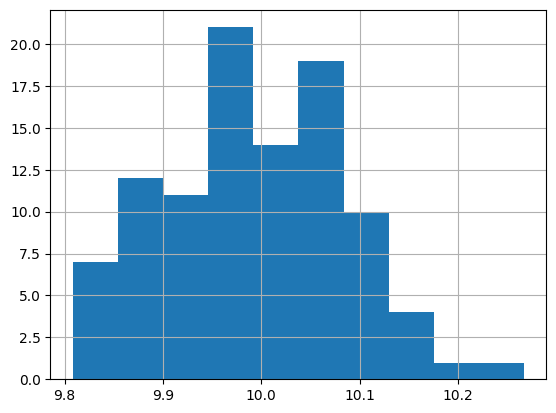

In [ ]:
#Гистограмма средствами pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
sample = df[df.columns[0]]
sample.hist()

Text(0, 0.5, 'Число образцов')

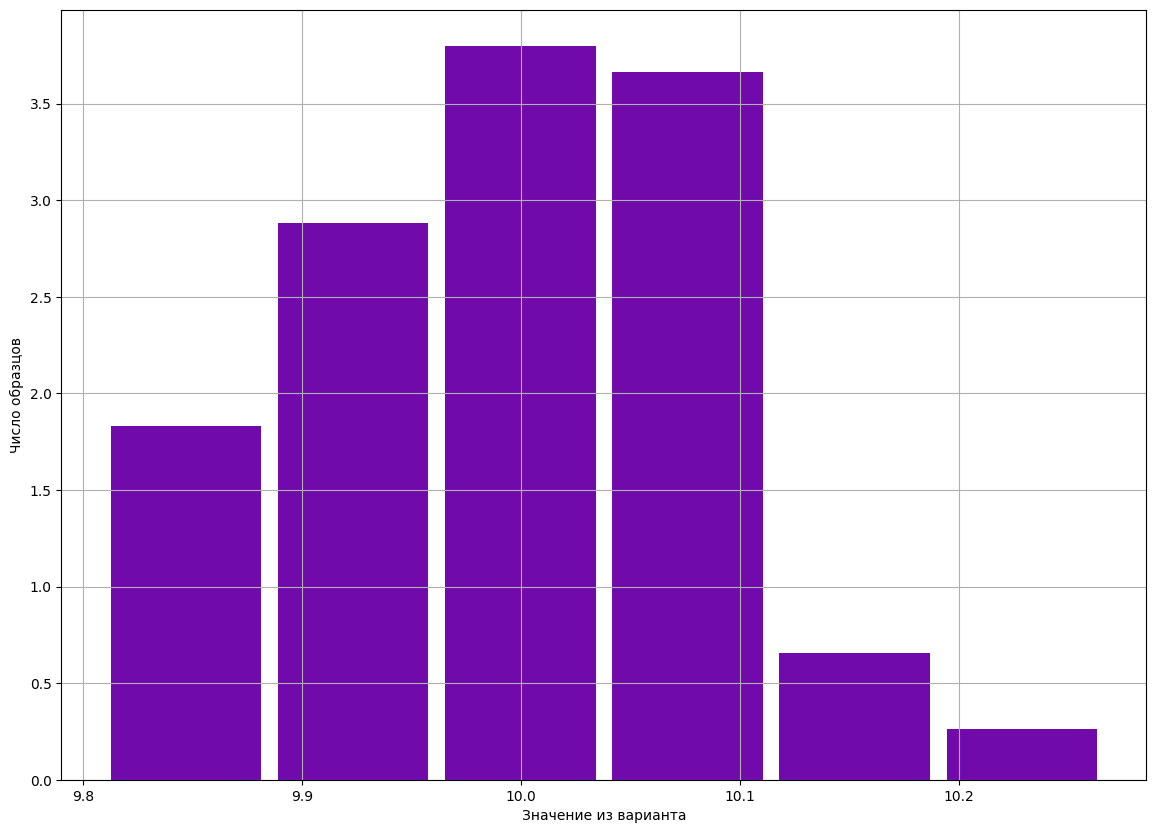

In [ ]:
#Гистограмма для взрослых: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

n_bins = 6
fig, ax = plt.subplots(figsize=(297//20 ,210//20),dpi=100)
n, bins, patches = ax.hist(sample, bins=n_bins, rwidth=0.9, color=[0.44,0.04,0.67],density=1)
ax.grid(True)
ax.set_xlabel('Значение из варианта')
ax.set_ylabel('Число образцов')

Мы можем даже сделать секторные диаграммы, разделив данные по каким-либо признакам.

(-1.1249506478797606,
 1.623964010716566,
 -1.0999991228017807,
 1.0999999582286561)

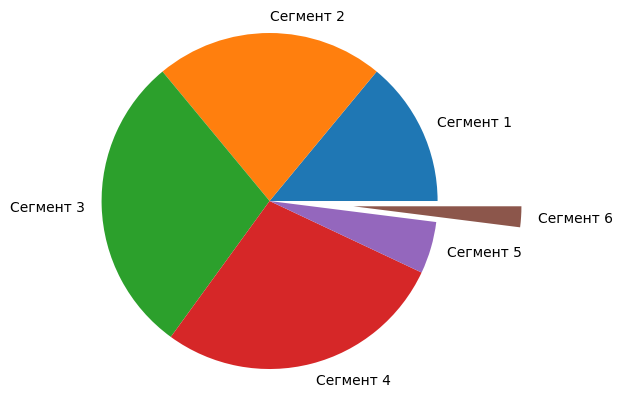

In [ ]:
#Секторная диаграмма: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
vals = n
labels = [f"Сегмент {i+1}" for i in range(len(n))]

fig, ax = plt.subplots()
ax.pie(vals, labels=labels,explode=[0 for i in range(len(n)-1)]+[0.5])
ax.axis("equal")

В принципе, мы можем построить сразу все гистограммы и это даже не потребует много кода.

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

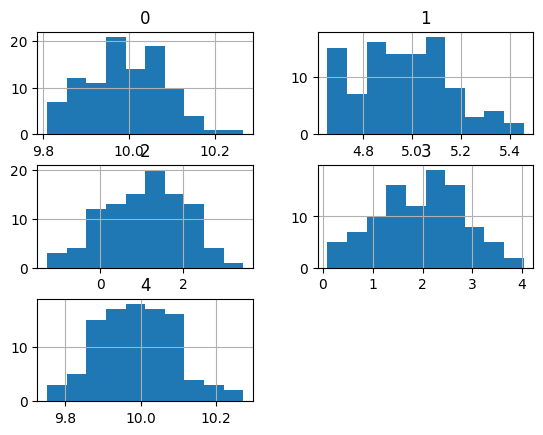

In [ ]:
df.hist()

Но давайте на секунду представим, что у нас не 5 признаков, а 1000. Это не такая уж и редкая картина в анализе данных.
Нас спасут ящики с усами.

<Axes: >

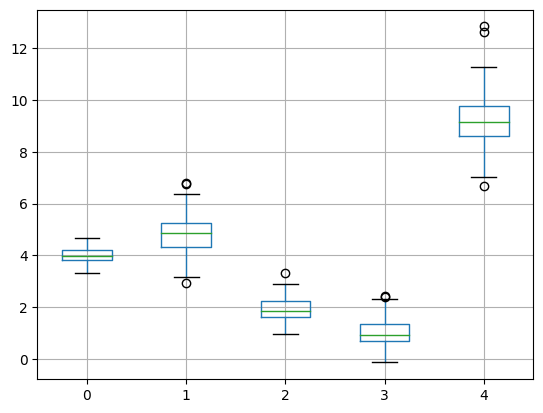

In [ ]:
df.boxplot()

Text(0, 0.5, 'Значение')

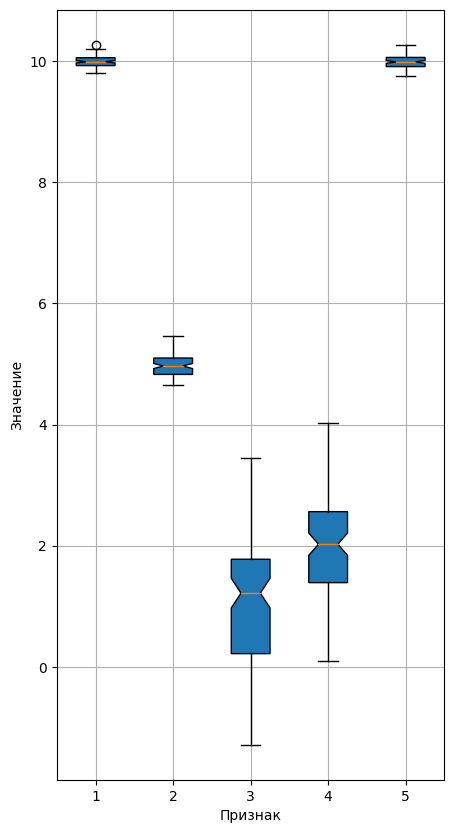

In [ ]:
# Ящики с усами для взрослых: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
# ...и для детей: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

fig, ax = plt.subplots(figsize=(5 ,10),dpi=100)
boxplot_dict = ax.boxplot(df.values, notch=1,patch_artist=True,)
ax.grid(True)
ax.set_xlabel('Признак')
ax.set_ylabel('Значение')

Если ящики не передают необходимой информации, то можно воспользоваться ящиками на стероидах.

Text(0, 0.5, 'Значение')

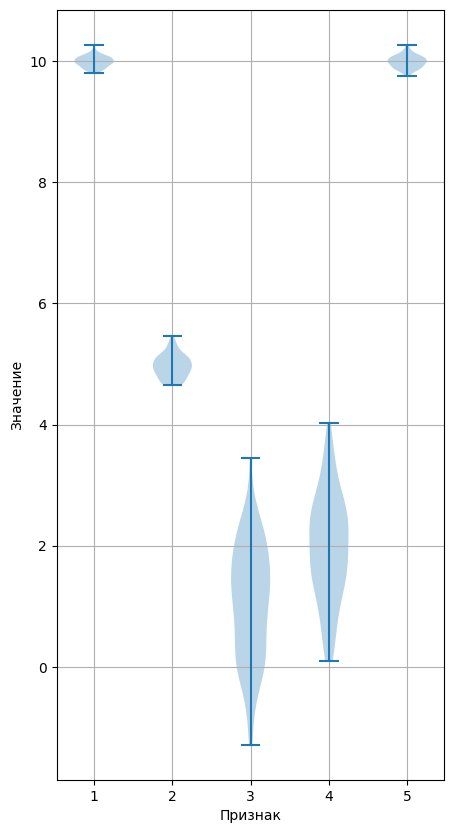

In [ ]:
#Скрипочные диаграммы: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html#matplotlib.pyplot.violinplot

fig, ax = plt.subplots(figsize=(5 ,10),dpi=100)
boxplot_dict = ax.violinplot(df.values)
ax.grid(True)
ax.set_xlabel('Признак')
ax.set_ylabel('Значение')

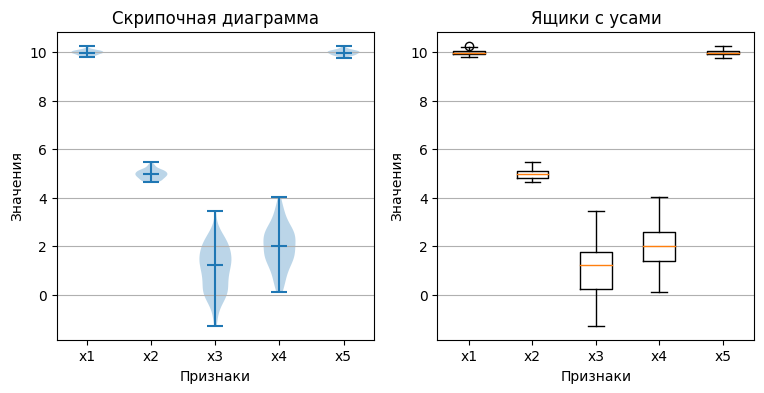

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# plot violin plot
axs[0].violinplot(df.values,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Скрипочная диаграмма')

# plot box plot
axs[1].boxplot(df.values)
axs[1].set_title('Ящики с усами')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(5)],
                  labels=['x1', 'x2', 'x3', 'x4','x5'])
    ax.set_xlabel('Признаки')
    ax.set_ylabel('Значения')

plt.show()

In [ ]:
df.violinplot()

AttributeError: ignored